# Half Adder

In classical computers, we use full adders and half adders for addition. 

Half adder takes <b> two inputs and produces two outputs such as Sum (as LSB) and Carry (as MSB) </b>

In Half adder circuit we use XOR gate for sum operation and AND gate for carry operation.

<i> We will use this gate level approach for qubit implementation of Half adder. </i>


<img src="files/fig1.png">

<b> To get started we import all the necessary libraries and make sure we are running at latest version. </b>

In [1]:
# import qiskit library and printing the version
import qiskit
print(qiskit.__qiskit_version__)

{'qiskit-terra': '0.16.3', 'qiskit-aer': '0.7.3', 'qiskit-ignis': '0.5.1', 'qiskit-ibmq-provider': '0.11.1', 'qiskit-aqua': '0.8.1', 'qiskit': '0.23.4'}


In [2]:
# import necessary libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute, Aer


First phase implementation of <b> Half adder would be implementing XOR gate. </b> XOR gates produce output 1 when its two inputs are different. We use CNOT Gate for this functionality. CNOT gate flips  the value on the second bit depending on the value of the control bit (if control bit is 1,then flip the second bit otherwise no change.

Second phase implementation of <b> Half Adder would be implementing AND gate. </b> AND gate produce ouput 1 when its two 
inputs are 1. we can use the CCNOT gate. If we can use control qubits (x and y) as input qubits 
we can achieve the AND operation.Then the result of AND is XOR with input qubit (z). 
If we can make Z always equal to 0 it will not flip the results of the AND operation. 
In another word, we are using the Z qubit as an ancillary bit.


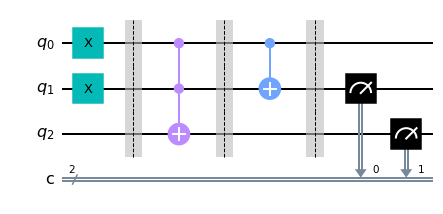

In [3]:
# creating quantum register with 3 quantum bits
q = QuantumRegister(3,'q')
# creating classical register with 2 classical bits
c = ClassicalRegister(2,'c')
# Creating a circuit with 3 quantum bits and 2 classical bits
qc = QuantumCircuit(q,c)

# inputs
qc.x(0) # Comment this line for qubit 0 to 0
qc.x(1) # Comment this line for qubit 1 to 0

qc.barrier()

# Applying AND operation and put result to Qubit 2
qc.ccx(0,1,2)
qc.barrier()

# Applying XOR operation and put result to Qubit 1
qc.cx(0,1)
qc.barrier()

# Reading outputs
qc.measure(1,0) # Reading XOR value ( sum bit )
qc.measure(2,1) # Reading AND value ( carry-out bit )

qc.draw(output='mpl')

Running the quantum circuit for 1024 times in the local simulator

In [4]:
# Run the experiment 1024 times and get stats
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)
counts = job.result().get_counts(qc)
print('16 qubit Randomly Generated is: ',counts,'\n')

16 qubit Randomly Generated is:  {'10': 1024} 

